In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix,plot_confusion_matrix, plot_precision_recall_curve,roc_auc_score, roc_curve, plot_roc_curve
from mlxtend.plotting import plot_decision_regions

In [2]:
iris_X, iris_y = load_iris(return_X_y=True)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-75]]
iris_y_train = iris_y[indices[:-75]]
iris_X_test = iris_X[indices[-75:]]
iris_y_test = iris_y[indices[-75:]]
iris_y_train_2 = (iris_y_train == 2)
iris_y_true = (iris_y_test == 2)

In [4]:
y_train = []
for y in iris_y_train_2:
    if y == True:
        y_train.append(1)
    else:
        y_train.append(0)
        
y_train= np.array(y_train)

# EXERCISE 1

In [5]:
model = make_pipeline(StandardScaler(), LinearSVC())
model = model.fit(iris_X_train, y_train)

# EXERCISE 2

In [6]:
y_pred = cross_val_predict(model, iris_X_train, y_train)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0])

In [7]:
confusion_matrix(y_train, y_pred)

array([[50,  1],
       [ 1, 23]])

# EXERCISE 3

In [8]:
precision = precision_score(y_train, y_pred)
precision

0.9583333333333334

# EXERCISE 4

In [9]:
recall = recall_score(y_train, y_pred)
recall

0.9583333333333334

# EXERCISE 5

In [10]:
f1 = f1_score(y_train, y_pred)
f1

0.9583333333333334

# EXERCISE 6

In [11]:
y_scores = cross_val_predict(model, iris_X_train, y_train, method='decision_function')
y_scores

array([ 2.09823266, -0.91794586, -7.17321691,  1.39621413, -6.04483492,
        2.16375951, -6.05444145, -0.54534913, -0.27987274, -1.05429096,
        0.3055113 , -0.84583616, -0.93065459, -0.19566297, -0.60820744,
       -6.56125517, -0.57220363, -0.7336166 , -5.38672943, -6.57190233,
        1.00255608, -0.62211249, -5.66359025, -5.36529746,  0.34003313,
       -6.65740325, -6.20910891, -1.20098614, -1.64700084, -5.94171413,
        0.51315936, -0.42907057, -6.68299586,  0.18656665,  1.74080471,
       -0.75517692, -6.81213264,  0.5246801 , -0.85899756, -1.29465923,
        1.12739769, -5.95127621,  1.34496785, -5.20140518, -6.37145646,
       -1.41909806,  0.80548781,  2.15644706,  0.83471466,  1.64045887,
       -1.46230077,  2.03840567, -0.65633875, -1.42870011,  0.51357837,
       -0.0701594 ,  0.35234077,  0.99992069, -1.06304135,  0.91891259,
       -0.87356006, -5.79090199,  1.11802745, -0.8883185 , -1.62163726,
       -0.75162527, -0.83511727,  0.71795093, -6.75762768, -6.19

In [12]:
pre, rec, thr = precision_recall_curve(y_train, y_scores)

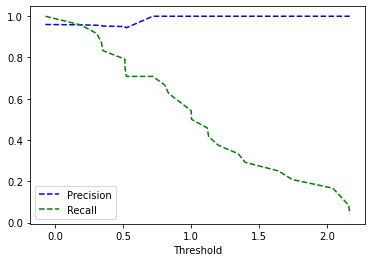

In [13]:
plt.plot(thr, pre[:-1], 'b--', label='Precision')
plt.plot(thr, rec[:-1], 'g--', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')

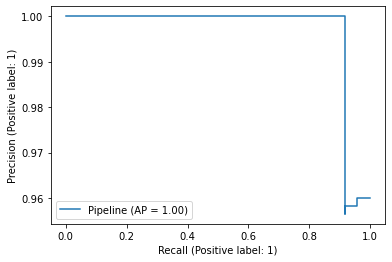

In [14]:
plot_precision_recall_curve(model, iris_X_train, y_train)

# EXERCISE 7

In [15]:
roc_auc_score = roc_auc_score(y_train, y_scores)
roc_auc_score

0.9942810457516339

# EXERCISE 8

In [16]:
fpr, tpr, thr2 = roc_curve(y_train, y_scores)

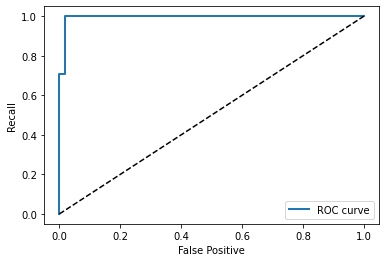

In [17]:
plt.plot(fpr, tpr, linewidth=2, label='ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive')
plt.ylabel('Recall')
plt.legend(loc='lower right')

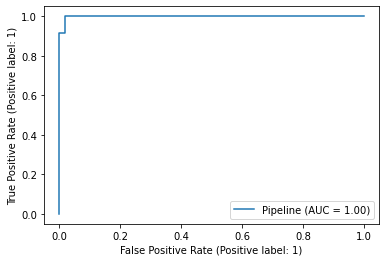

In [18]:
plot_roc_curve(model, iris_X_train, y_train)

# EXERCISE 9

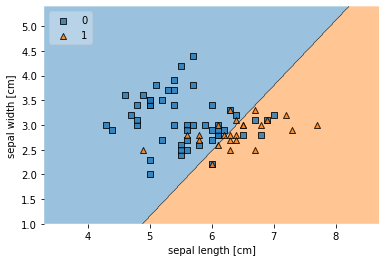

In [19]:
X_train_filtered = iris_X_train[:, [0,1]]

model_filtered = make_pipeline(StandardScaler(), LinearSVC())
model_filtered = model_filtered.fit(X_train_filtered, y_train)

plot_decision_regions(X_train_filtered, y_train, model_filtered, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.show()